played


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


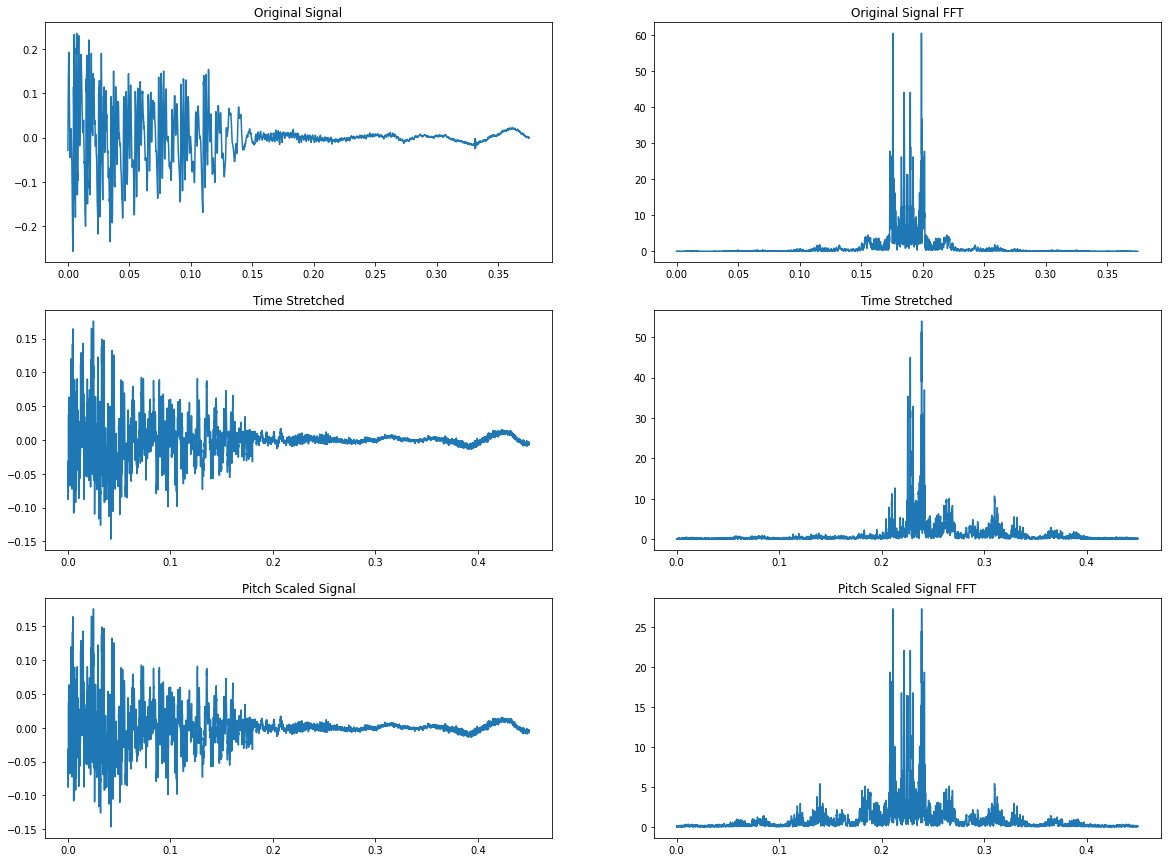

In [ ]:
import numpy as np
from scipy.io import wavfile
from numpy.fft import fft, ifft, fftshift

def hamming(M):
	n = np.arange(M)
	return 0.54 - 0.46 * np.cos( 2 * np.pi * n / (M - 1))

def hann(M):
	n = np.arange(M)
	return 0.5 - 0.5 * np.cos( 2 * np.pi * n / (M - 1))

def rectwin(M):
	return np.ones(M)

def phase_voc(x, ts_ratio, L = 1024, H = 256, win = hamming):
	
	
	syn_hop = int(np.ceil(H * ts_ratio))
	N = len(x)
	w = win(L)
	gain = 1. / (L * np.sum((win(L) * win(L))) / syn_hop)
	unwrapdata = 2 * np.pi * H / L * np.arange(0, L).T
	yangle, ysangle = np.zeros(L), np.zeros(L)
	ys = np.zeros(L, dtype = complex)
	yprevwin = np.zeros(L - syn_hop, dtype = complex)

	first_time = True
	y = np.array(0)

	for i in np.arange(0, N - L, H):

		yprevangle = yangle

		### Analysis with windowed fft of ST signal ###
		yfft = fft(w * x[i : i + L])
		ymag, yangle = np.abs(yfft), np.angle(yfft)

		###############################################

		# Synthesis Phase Calculation
		# The synthesis phase is calculated by computing the phase increments
		# between successive frequency transforms, unwrapping them, and scaling
		# them by the ratio between the analysis and synthesis hop sizes.

		yunwrap = (yangle - yprevangle) - unwrapdata
		yunwrap = yunwrap - np.round(yunwrap / (2.*np.pi)) * 2 * np.pi
		yunwrap = (yunwrap + unwrapdata) * ts_ratio

		if first_time:
			ysangle = yangle
			first_time = False
		else:	ysangle += yunwrap

		### synthesis ###
		# Convert magnitude and phase to complex numbers.
		ys.real, ys.imag = np.cos(ysangle), np.sin(ysangle)
		ys *= ymag
		ywin = ifft(w * ys)

		# Overlap-add operation
		olapadd = np.hstack((ywin[:L - syn_hop] + yprevwin,\
					ywin[L - syn_hop : ]))
		yistfft = olapadd[: syn_hop]
		yprevwin = olapadd[syn_hop  : ]

		# Compensate for the scaling that was introduced by the 
		# overlap-add peration
		yistfft = yistfft * gain
		y = np.hstack((y, yistfft))

	return y * np.max(np.abs(x)) / np.max(np.abs(y))

infile, tsfile, psfile = 'neutral1.wav', 'out1.wav', 'out2.wav'
Fs, x = wavfile.read(infile)

import sys
scale = 1.2
y = phase_voc(x, 1.2, L = 1024, H = 128, win = hamming)
# y = y*3

wavfile.write(tsfile , Fs, np.array(np.real(y)))
wavfile.write(psfile , int(Fs * scale), np.array(np.real(y)))
_,x2 = wavfile.read(psfile)

from os import system
try:
	system('play '+ infile + ' ' + tsfile + ' ' + psfile)
	print ('played')
except:
	print ('not played')

import pylab as plt
fig = plt.figure(figsize = (20, 15))


fig.add_subplot(321)
axis1 = np.linspace(0, 6000 / Fs, num = 6000)
plt.plot(axis1, x[34000:40000])
plt.title('Original Signal')

fig.add_subplot(323)
axis2 = np.linspace(0, 6000*scale/Fs, num = int(6000*scale))
plt.plot(axis2, y[int(34000*scale):int(40000*scale)])
plt.title('Time Stretched')


fig.add_subplot(325)
axis3 = np.linspace(0, 6000*scale/Fs, num = int(6000*scale))
plt.plot(axis3, x2[int(34000*scale):int(40000*scale)])
plt.title('Pitch Scaled Signal')


fig.add_subplot(322)
plt.plot(axis1, np.abs(fftshift(fft(x[34000:40000]))))
plt.title('Original Signal FFT')

fig.add_subplot(324)
plt.plot(axis2, np.abs(fftshift(fft(y[int(34000*scale):int(40000*scale)]))))
plt.title('Time Stretched')

fig.add_subplot(326)
plt.plot(axis3, np.abs(fftshift(fft(x2[int(34000*scale):int(40000*scale)]))))
plt.title('Pitch Scaled Signal FFT')
plt.show()

In [ ]:
Dnp.max(np.abs(x2))

0.9999999266957401

In [ ]:
Fs

16000

In [2]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display as ld
# from pydub import AudioSegment
from numpy.fft import fft, ifft

In [3]:
y, sr = librosa.load(librosa.ex('neutral1.wav'))
Audio(data=y, rate=sr)

ParameterError: ignored